<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Analyzing_data_in_the_JARVIS_DFT_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

1. Loading JARVIS-DFT 3D and 2D json from figshare 
2. Making pandas dataframe,
3. Properties available, keys
4. Histogram of properties
5. Compare bandgaps from different DFT methods, OptB88vdW, TBmBJ
6. Multi-property filter for 3D material-screenig example
7. Example: find all cubic materials
8. Exfoliation energy distribution for 2D materials
9. Multi-property filter for 2D dataset

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### We have prepared a basic json file with meta-data associated with JARVIS-DFT. So, first let's import jarvis-dft metadata from the figshre repository. This has been built as a module in the jarvis-tools


In [2]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data

dft_3d = data('dft_3d')
dft_2d = data('dft_2d')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [3]:
# data-size
print (len(dft_3d),len(dft_2d))

55723 1079


In [4]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(dft_3d)

In [5]:
# Keys in the json file
print (df.columns, len(df.columns))

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

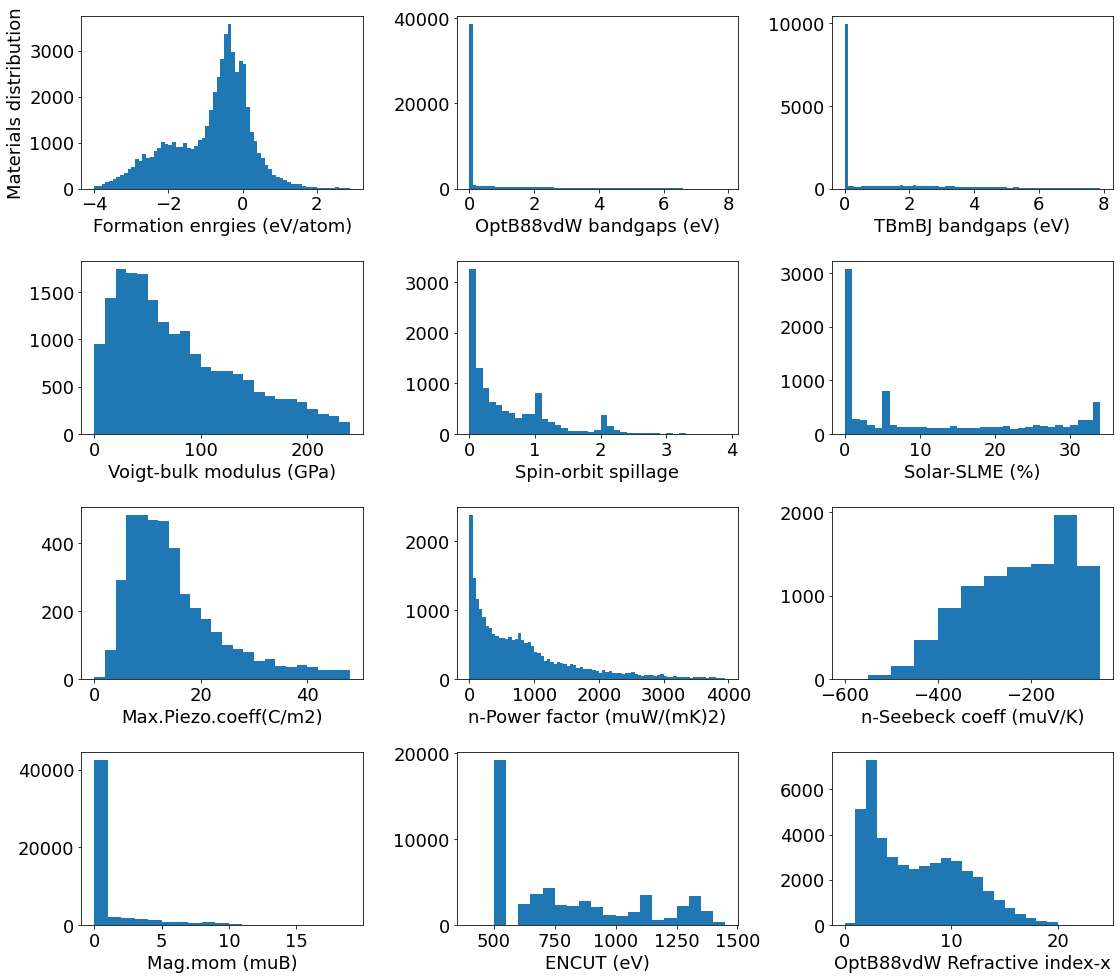

In [6]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(4, 3)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0, 0])
val=np.array(df['formation_energy_peratom'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('Formation enrgies (eV/atom)')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 1])
val=np.array(df['optb88vdw_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('OptB88vdW bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 2])
val=np.array(df['mbj_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('TBmBJ bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 0])
val=np.array(df['bulk_modulus_kv'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,250,10))
plt.xlabel('Voigt-bulk modulus (GPa)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[1, 1])
val=np.array(df['spillage'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4,.1))
plt.xlabel('Spin-orbit spillage')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 2])
val=np.array(df['slme'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,35,1))
plt.xlabel('Solar-SLME (%)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[2, 0])
val=np.array(df['dfpt_piezo_max_dielectric'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,50,2))
#plt.ylabel('Materials distribution')
plt.xlabel('Max.Piezo.coeff(C/m2)')


plt.subplot(the_grid[2, 1])
val=np.array(df['n-powerfact'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4000,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Power factor (muW/(mK)2)')

plt.subplot(the_grid[2, 2])
val=np.array(df['n-Seebeck'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(-600,0,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Seebeck coeff (muV/K)')


plt.subplot(the_grid[3, 0])
val=np.array(df['magmom_oszicar'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,1))
#plt.ylabel('Materials distribution')
plt.xlabel('Mag.mom (muB)')


plt.subplot(the_grid[3, 1])
val=np.array(df['encut'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(400,1500,50))
#plt.ylabel('Materials distribution')
plt.xlabel('ENCUT (eV)')



plt.subplot(the_grid[3, 2])
val=np.sqrt(np.array(df['epsx'].replace('na',np.nan).dropna().values,dtype='float'))
plt.hist(val,bins=np.arange(0,25,1))
#plt.ylabel('Materials distribution')
plt.xlabel('OptB88vdW Refractive index-x')

plt.tight_layout()

Mats. with both OptB88vdW bandgaps 55723
Mats. with both TBmBJ abd OptB88vdW bandgaps 18172


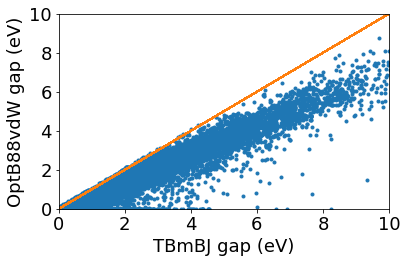

In [7]:
# Let's compare OptB88vdW and TBmBJ bandgaps
df2=df[['optb88vdw_bandgap','mbj_bandgap']].replace('na',np.nan).dropna()
plt.plot(df2['mbj_bandgap'], df2['optb88vdw_bandgap'],'.')
plt.plot(df2['mbj_bandgap'], df2['mbj_bandgap'])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('TBmBJ gap (eV)')
plt.ylabel('OptB88vdW gap (eV)')
plt.tight_layout()
print ('Mats. with both OptB88vdW bandgaps', len(df['optb88vdw_bandgap']))
print ('Mats. with both TBmBJ abd OptB88vdW bandgaps', len(df2['mbj_bandgap']))

### Material-screening example: Let's find materials which has Bi element, has spin-orbit spillage >= 0.5, have OptB88vdW bandgaps > 0.1, energy above convex hull < 0.1 eV/atom , have SLME >5 %

In [8]:
df3 = df[['optb88vdw_bandgap','spillage', 'ehull', 'slme', 'atoms', 'jid']].replace('na',np.nan).dropna()

In [9]:
from jarvis.core.atoms import Atoms
def has_element(atoms_dict = {}, my_element = 'Bi'):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if my_element in elements:
        return True
    else:
        return np.nan
    
df3['el'] = df3['atoms'].apply(lambda x: has_element(atoms_dict = x, my_element = 'Bi'))
df3['formula'] = df3['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [10]:
df4 = df3.dropna()

In [11]:
df4[(df4['optb88vdw_bandgap'] >= .1) & (df4['spillage'] >=.5 ) & (df4['ehull'] <=.1 ) & (df4['slme'] >=5 )  ]

,optb88vdw_bandgap,spillage,ehull,slme,atoms,jid,el,formula
22949,0.634,2.072,0.000000,33.83,"{'lattice_mat': [[2.3842715689309357, -4.12967...",JVASP-4050,True,CaMg2Bi2
30538,0.419,2.040,0.000500,33.44,"{'lattice_mat': [[5.2477952475750245, -3.63754...",JVASP-56110,True,K3Bi
30854,0.719,1.091,0.045741,29.84,"{'lattice_mat': [[4.260514703242369, 1.1598804...",JVASP-32759,True,BiBr
31873,0.104,0.710,0.000000,31.28,"{'lattice_mat': [[-0.0, 3.9385699116371127, 3....",JVASP-40945,True,KNa2Bi
32562,0.223,2.051,0.000000,20.76,"{'lattice_mat': [[-0.0, 3.8360880678246505, 3....",JVASP-41154,True,Na2TlBi
33126,0.555,2.094,0.000000,33.93,"{'lattice_mat': [[4.899594431025933, 0.0, 0.0]...",JVASP-35067,True,KMgBi
39278,0.245,2.044,0.000000,28.53,"{'lattice_mat': [[5.479726453785257, -1.209409...",JVASP-18362,True,Rb3Bi
46861,0.159,2.118,0.000000,32.22,"{'lattice_mat': [[3.072973280516805, -5.322546...",JVASP-56367,True,K3Bi


### Find all cubic materials

In [12]:
df.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

In [13]:
# from jarvis.analysis.structure.spacegroup import Spacegroup3D
# # Takes some time because we are running spacegroup analysis on all the materials
# def crystal_system(atoms_dict={}):
#     atoms = Atoms.from_dict(atoms_dict)
#     system = Spacegroup3D(Atoms.from_dict(atoms_dict)).crystal_system
#     return system
# df['crystal_system'] = df['atoms'].apply(lambda x: crystal_system(atoms_dict = x))

In [14]:
len(df[df['crys']=='cubic'])

14822

In [15]:
# We can store the screened materials in a new json file
# Note that the primitive cell can have non-equal lattice-constants but not the conventional cell
from jarvis.db.jsonutils import dumpjson
dumpjson(data = df[df['crys']=='cubic']['atoms'].values.tolist(), filename='all_cubic.json')

### Working with 2D dataset

In [16]:
df_2d=pd.DataFrame(dft_2d)

In [17]:
df_2d.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'kpoints_array',
       'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx',
       'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar',
       'icsd', 'dfpt_piezo_max_eij', 'dfpt_piezo_max_dij',
       'dfpt_piezo_max_dielectric', 'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference', 'search', 'desc'],
      dtype='o

Text(0.5, 0, 'Exfoliation energy (eV)')

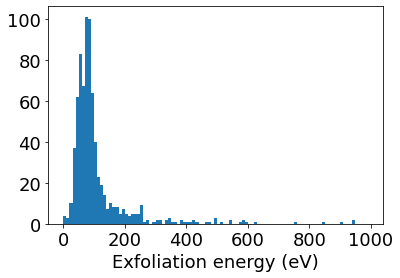

In [18]:
val=np.array(df_2d['exfoliation_energy'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,1000,10))
#plt.ylabel('Materials distribution')
plt.xlabel('Exfoliation energy (eV)')

In [19]:
#Let's find exfoliable 2D materials with magnetic moment>0.5 muB , optb88vdw_bandgap > 0.05 and exfoliation_energy < 200

In [20]:
df_2d_a = df_2d[['atoms', 'optb88vdw_bandgap','exfoliation_energy', 'magmom_oszicar','jid']].replace('na',np.nan).dropna()

In [21]:
df_2d_a['formula'] = df_2d_a['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [22]:
df_2d_a[(df_2d_a['optb88vdw_bandgap'] >= .05) & (df_2d_a['exfoliation_energy'] <200 ) & (df_2d_a['magmom_oszicar'] >=.5  )  ]

,atoms,optb88vdw_bandgap,exfoliation_energy,magmom_oszicar,jid,formula
54,"{'lattice_mat': [[3.1107329622197213, 0.0, 0.0...",0.352,68.949500,2.000,JVASP-60589,NiTeO4
74,"{'lattice_mat': [[6.342736616079045, 4.0756293...",1.470,79.077625,6.000,JVASP-6088,CrBr3
75,"{'lattice_mat': [[3.1979506617490285, 0.0, 0.0...",0.584,38.934500,6.000,JVASP-27906,CrClO
153,"{'lattice_mat': [[6.058153846304347, 0.0, 0.0]...",0.248,66.609000,9.892,JVASP-75361,MnPS3
155,"{'lattice_mat': [[3.6393088883325624, 8.317665...",0.460,54.793286,1.969,JVASP-75357,NiC2S2N2
158,"{'lattice_mat': [[4.585681019269083, 1.5713669...",1.729,124.624000,5.000,JVASP-75350,LiFeF4
165,"{'lattice_mat': [[3.2651579585109913, -8.59494...",0.679,54.869667,4.000,JVASP-75331,VOF
172,"{'lattice_mat': [[5.825064631761128, 1.9232331...",0.106,57.939583,0.938,JVASP-75320,Co3TeO8
174,"{'lattice_mat': [[3.1825586772463623, 0.0, 0.0...",0.536,98.102800,5.999,JVASP-75319,LiVF3
178,"{'lattice_mat': [[3.307945107873234, 0.0, 0.0]...",0.238,66.857800,4.998,JVASP-27913,MnH2O2
